# Retinal OCT Images (optical coherence tomography)

## 1. Business Problem

## 1.1 Description

Retinal optical coherence tomography (OCT) is an imaging technique used to capture high-resolution cross sections of the retinas of living patients. Approximately 30 million OCT scans are performed each year, and the analysis and interpretation of these images takes up a significant amount of time (Swanson and Fujimoto, 2017).

<img src="one.png">
Figure 2. Representative Optical Coherence Tomography Images and the Workflow Diagram [Kermany et. al. 2018]

(A) (Far left) choroidal neovascularization (CNV) with neovascular membrane (white arrowheads) and associated subretinal fluid (arrows). (Middle left) Diabetic macular edema (DME) with retinal-thickening-associated intraretinal fluid (arrows). (Middle right) Multiple drusen (arrowheads) present in early AMD. (Far right) Normal retina with preserved foveal contour and absence of any retinal fluid/edema.

## 1.2. Data Description

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (NORMAL,CNV,DME,DRUSEN). There are 84,495 X-Ray images (JPEG) and 4 categories (NORMAL,CNV,DME,DRUSEN).

Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL.

Optical coherence tomography (OCT) images (Spectralis OCT, Heidelberg Engineering, Germany) were selected from retrospective cohorts of adult patients from the Shiley Eye Institute of the University of California San Diego, the California Retinal Research Foundation, Medical Center Ophthalmology Associates, the Shanghai First People’s Hospital, and Beijing Tongren Eye Center between July 1, 2013 and March 1, 2017.

Before training, each image went through a tiered grading system consisting of multiple layers of trained graders of increasing exper- tise for verification and correction of image labels. Each image imported into the database started with a label matching the most recent diagnosis of the patient. The first tier of graders consisted of undergraduate and medical students who had taken and passed an OCT interpretation course review. This first tier of graders conducted initial quality control and excluded OCT images containing severe artifacts or significant image resolution reductions. The second tier of graders consisted of four ophthalmologists who independently graded each image that had passed the first tier. The presence or absence of choroidal neovascularization (active or in the form of subretinal fibrosis), macular edema, drusen, and other pathologies visible on the OCT scan were recorded. Finally, a third tier of two senior independent retinal specialists, each with over 20 years of clinical retina experience, verified the true labels for each image. The dataset selection and stratification process is displayed in a CONSORT-style diagram in Figure 2B. To account for human error in grading, a validation subset of 993 scans was graded separately by two ophthalmologist graders, with disagreement in clinical labels arbitrated by a senior retinal specialist.
For additional information: see http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

# Problem Statement

- **Correctly classify Retinal OCT(optical coherence tomography) Images**

## 1.2 Source/Useful links

### 1.2.1. Data Source

**Source :** https://www.kaggle.com/paultimothymooney/kermany2018

### 1.2.2. Reference
- http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
- https://www.kaggle.com/paultimothymooney/kermany2018

## 1.3. Real World/Business Objectives and Constraints

- **Acurately predict Retinal optical coherence tomography(OCT).**
- **No low latency constraint.**
- **Errors can be very costly.**
- **Probability of a data-point belonging to each class is needed.**

## 2. Machine Learning Problem Formulation

### 2.1. Data

- **Source :** https://www.kaggle.com/paultimothymooney/kermany2018

- We have tow data folders train and test.
- train folder contains 83484 images and test folder contains 1000 images

### 2.2. Mapping the real-world problem to an ML problem

#### 2.2.1. Type of machine learning problem

- There are four different classes CNV, DME, DRUSEN, NORMAL => Multi-class classification problem

#### 2.2.2. Performence Metric

**Metric(s) :-**
- **Micro-avg f1-score**
- **Confusion Matrix**

### 2.2.3. Machine Learing Objectives and Constraints

**Objective: Predict the probability of each data-point belonging to each of the four classes.**

**Constraints:**
- Interpretability
- Class probabilities are needed.
- Penalize the errors in class probabilites => Metric is Log-loss.
- No Latency constraints.

## 3. Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import datetime
from datetime import date
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import shutil
import pickle
# import imageio

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rcParams["figure.figsize"] = (12, 8) # (w, h)
# from tqdm import tqdm
import pickle
#!find . -name ".DS_Store" -print -delete

In [3]:
from __future__ import print_function
import cv2
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50
#from tensorflow.keras.utils import np_utils 
from tensorflow.keras import utils 
from tensorflow.keras.initializers import RandomNormal
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau




from tensorflow.keras.layers import *
# from keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
import os

from tensorflow.keras import backend as K

In [4]:

# Importing all the needed modules.
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
# from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
#from tensorflow.keras.utils import np_utils
from tensorflow.keras import utils
#from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.inception_v3 import InceptionV3
# from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from tensorflow.keras.models import load_model
#from tensorflow.keras.utils import np_utils
from tensorflow.keras import utils
from sklearn.metrics import log_loss

%matplotlib inline

In [5]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

## 3.1 Data Preparation

In [6]:
def load_data(folder):
    """
        This function takes data folder path as input and returns a dataframe
        which contains filename, filepath, class.
    """
    X = []
    Z = []
    Y = []
    
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName == 'CNV':
                label = 0
            elif folderName == 'DME':
                label = 1
            elif folderName == 'DRUSEN':
                label = 2
            elif folderName == 'NORMAL':
                label = 3
            else:
                label = 4
            for file in os.listdir(folder+'/'+folderName):
                if not file.startswith('.'):
                    X.append(file)
                    Z.append(folder+'/'+folderName+'/'+file)
                    Y.append(label)
    return pd.DataFrame(np.hstack((np.asarray(X).reshape(-1,1),np.asarray(Z).reshape(-1,1), \
                                   np.asarray(Y).reshape(-1,1))), columns=['filename', 'path', "Class"]).sort_values("Class")

In [7]:
if not os.path.isfile("data.csv"):
    data = load_data("data/OCT2017/train")
    data.to_csv("data.csv", index=False)
    
data = pd.read_csv("data.csv")
data.head()

,filename,path,Class
0,CNV-1016042-1.jpeg,data/OCT2017/train/CNV/CNV-1016042-1.jpeg,0
1,CNV-7422289-82.jpeg,data/OCT2017/train/CNV/CNV-7422289-82.jpeg,0
2,CNV-7422289-83.jpeg,data/OCT2017/train/CNV/CNV-7422289-83.jpeg,0
3,CNV-7422289-84.jpeg,data/OCT2017/train/CNV/CNV-7422289-84.jpeg,0
4,CNV-7422289-85.jpeg,data/OCT2017/train/CNV/CNV-7422289-85.jpeg,0


In [8]:
data.shape

(83484, 3)

In [9]:
class_weights = data["Class"].value_counts()/data.shape[0]
class_weights = dict(class_weights)

In [10]:
class_dict = {0:"CNV", 1:"DME", 2:"DRUSEN", 3:"NORMAL"}
class_dict
classLabels = ["CNV", "DME", "DRUSEN", "NORMAL"]

### Data Class Distribution

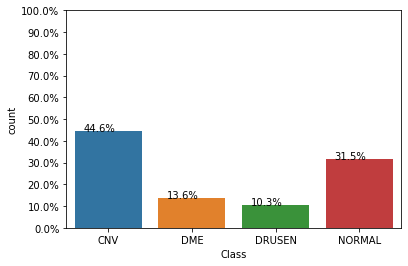

In [11]:
Y = data.copy()
Y["Class"] = Y["Class"].apply(lambda x: class_dict[x])
total = len(Y)*1
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [12]:

def sample_data(data, sample_size=2000):
    """
        This function take a dataset and select a smaller sample based on sample_size
    """
    
    if sample_size == data.shape[0]:
        return data
    
    class_weights = dict(data["Class"].value_counts()/data.shape[0])
    
    df0 = data[data["Class"]==0].sample(n=min(int(round(sample_size * class_weights[0])),len(data[data["Class"]==0])))
    df1 = data[data["Class"]==1].sample(n=min(int(round(sample_size * class_weights[1])),len(data[data["Class"]==1])))
    df2 = data[data["Class"]==2].sample(n=min(int(round(sample_size * class_weights[2])),len(data[data["Class"]==2])))
    df3 = data[data["Class"]==3].sample(n=min(int(round(sample_size * class_weights[3])),len(data[data["Class"]==3])))
    
    return pd.concat([df0, df1, df2, df3])
    

**Here we are taking 60000 images sample with same class distribution as in whole data. <br>
Train - Validation - Test split ==> 72.5% - 12.75% - 15%**

In [13]:
# Here we are taking 60000 images sample with same class distribution as in whole data
# Train - Validation - Test split ==> 72.5% - 12.75% - 15%

if not (os.path.isfile("X_train.p") and os.path.isfile("X_val.p") and os.path.isfile("X_test.p") and \
       os.path.isfile("y_train.p") and os.path.isfile("y_val.p") and os.path.isfile("y_test.p")):
    
    
    data_sampled = sample_data(data, 60000)
    print("Data Size : ", data_sampled.shape[0])
    
    X_data = data_sampled['path'].values
    Y_data = data_sampled["Class"].values
    
    
#     print("Data Size : ", data.shape[0])
    
#     X_data = data['path'].values
#     Y_data = data["Class"].values
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, stratify=Y_data, test_size=0.15, random_state=42)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.15, random_state=42)
    
    
    y_train = np_utils.to_categorical(Y_train, 4) 
    y_test = np_utils.to_categorical(Y_test, 4)
    y_val = np_utils.to_categorical(Y_val, 4)
    
    pickle.dump(X_train, open("X_train.p","wb"))
    pickle.dump(X_val, open("X_val.p","wb"))
    pickle.dump(X_test, open("X_test.p","wb"))

    pickle.dump(y_train, open("y_train.p","wb"))
    pickle.dump(y_val, open("y_val.p","wb"))
    pickle.dump(y_test, open("y_test.p","wb"))
    

    
X_train = pickle.load(open("X_train.p","rb"))
X_val = pickle.load(open("X_val.p","rb"))
X_test = pickle.load(open("X_test.p","rb"))

y_train = pickle.load(open("y_train.p","rb"))
y_val = pickle.load(open("y_val.p","rb"))
y_test = pickle.load(open("y_test.p","rb"))


print("Train Data Size : ", len(X_train))
print("Val Data Size : ", len(X_val))
print("Test Data Size : ", len(X_test))



Train Data Size :  43350
Val Data Size :  7650
Test Data Size :  9000


# 4. ML Models

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
def plt_dynamic(x, vy, ty, ax, plot_label, colors=['b']):
    
    ''' this function is used to update the plots for each epoch and error'''
    
    ax.plot(x, vy, 'b', label="Validation " + plot_label)
    ax.plot(x, ty, 'r', label="Train " + plot_label)
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    

    
def plot_confusion_matrix(test_y, test_predict_y, data_type):
    ''' This function plots the confusion , precision and recall matrices given y_i, y_i_hat. '''
    
    C = confusion_matrix(test_y, test_predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,5))
    plt.suptitle(data_type + " Confusion, Presicion & Recall Matrix", fontsize=24)
   
    labels = ["CNV", "DME", "DRUSEN", "NORMAL"]
    # representing A in heatmap format
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [15]:
def imageToArray(files):
    ''' This function takes list of image files and convert each image into 3d arrays'''
    images = []
    for file in files:
        images.append(np.float32(cv2.resize(cv2.imread(file, 1), (224, 224) )) / 255.0)
    return np.asarray(images)

# Code copied from https://stackoverflow.com/questions/47200146/keras-load-images-batch-wise-for-large-dataset
 
def imageLoader(files, ys, batch_size):
    '''this function will help us to load images batch by batch then convert to array'''

    L = len(files)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
            X = imageToArray(files[batch_start:limit])
            Y = ys[batch_start:limit]

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size
            


In [16]:
# Copied from https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras

import tensorflow as tf
#import keras
import tensorflow.keras
from sklearn.metrics import f1_score

# This funtion act as custom metric keras models. This function calculates f1-micro score.

def f1(y_true, y_pred):
     return f1_score(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1), average='micro')

def f1_micro_score(y_true, y_pred):
    return tf.py_function(f1, (y_true, y_pred), tf.double) 

In [17]:
model_name = ["model_1.hdf5", "model_2.hdf5", "model_3.hdf5", "model_4.hdf5", "model_5.hdf5"]
log_dir_name = ["graph_1", "graph_2", "graph_3", "graph_4", "graph_5"]



def train_model(model, batch_size, epochs, model_no):
    
    """
    This function takes model, batch_size and no. of epochs as input and train the model.
    This function returns model and model history.
    """

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_micro_score])


    train_steps = len(X_train)//batch_size+1
    val_steps = len(X_val)//batch_size+1
    test_steps = len(X_test)//batch_size+1
    
    checkpoint = ModelCheckpoint(model_name[model_no], monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, verbose = 1, restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, verbose = 1, min_delta = 0.00001)

    tensorboard = TensorBoard(log_dir=log_dir_name[model_no], histogram_freq=0, batch_size=batch_size, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

    callbacks_list = [checkpoint, early_stopping, reduce_lr, tensorboard]
    
    history = model.fit_generator(imageLoader(X_train, y_train, batch_size),
          epochs=epochs,
          steps_per_epoch=train_steps,
          verbose=1,
          validation_data=imageLoader(X_val, y_val, batch_size),
          validation_steps=val_steps, callbacks=callbacks_list)
    
    return model, history



def report_of_model(model, model_name, batch_size = 64):
    
    """
    This function prints loss, metric, classification reports and confusion metrics for train, val and test data.
    This takes model, model_name and batch size as input and returns a list contaings model_name, loss and metric value.
    """
    
    train_steps = len(X_train)//batch_size+1
    val_steps = len(X_val)//batch_size+1
    test_steps = len(X_test)//batch_size+1
    
    train_score = model.evaluate_generator(imageLoader(X_train, y_train, batch_size), steps=train_steps, verbose=1)
    val_score = model.evaluate_generator(imageLoader(X_val, y_val, batch_size), steps=val_steps, verbose=1)
    test_score = model.evaluate_generator(imageLoader(X_test, y_test, batch_size), steps=test_steps, verbose=1)
    
    print("="*55)
    
    print("Train log-loss : ", round(train_score[0], 3))
    print("Validation log-loss : ", round(val_score[0], 3))
    print("Test log-loss : ", round(test_score[0], 3))
    
    print("="*55)
    
    y_train_pred = model.predict_generator(imageLoader(X_train, y_train, batch_size), steps=train_steps, verbose=1)
    y_val_pred = model.predict_generator(imageLoader(X_val, y_val, batch_size), steps=val_steps, verbose=1)
    y_test_pred = model.predict_generator(imageLoader(X_test, y_test, batch_size), steps=test_steps, verbose=1)
    
    train_f1_score = f1_score(y_train.argmax(axis=1), y_train_pred.argmax(axis=1), average='micro')
    val_f1_score = f1_score(y_val.argmax(axis=1), y_val_pred.argmax(axis=1), average='micro')  
    test_f1_score = f1_score(y_test.argmax(axis=1), y_test_pred.argmax(axis=1), average='micro')
    
    print("="*55)
    
    print("Train F1-micro avg score : ", round(train_f1_score,4))
    print("Val F1-micro avg score : ", round(val_f1_score,4))
    print("Test F1-micro avg score : ", round(test_f1_score,4))
    
    print("="*55)
    
    class_labels = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
    
    #Confution Matrix and Classification Report

    # Classification Report
    print('Train Classification Report')
    print(classification_report(y_train.argmax(axis=1), y_train_pred.argmax(axis=-1), target_names=class_labels))
    # Confusion Matrix
    print('Train Confusion Matrix')
    plot_confusion_matrix(y_train.argmax(axis=1), y_train_pred.argmax(axis=-1), "Train")
    
    
    # Classification Report
    print('Validation Classification Report')
    print(classification_report(y_val.argmax(axis=1), y_val_pred.argmax(axis=-1), target_names=class_labels))
    # Confusion Matrix
    print('Validation Confusion Matrix')
    plot_confusion_matrix(y_val.argmax(axis=1), y_val_pred.argmax(axis=-1), "Validation")
    
    # Classification Report
    print('Test Classification Report')
    print(classification_report(y_test.argmax(axis=1), y_test_pred.argmax(axis=-1), target_names=class_labels))
    # Confusion Matrix
    print('Test Confusion Matrix')
    plot_confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=-1), "Test")
    
    
    metric = [model_name] + train_score + val_score + test_score + [train_f1_score] + [val_f1_score] + [test_f1_score]
    
    return metric

In [18]:
input_shape = (np.float32(cv2.resize(cv2.imread(data["path"].values[0], 1), (224, 224) )) / 255.0).shape
input_shape

(224, 224, 3)

In [19]:
metrics = []
num_classes = 4

# 4.1. Deep Neural Models 

# 1) 3 layer CNN Model

In [63]:
# Ref : https://github.com/BadreeshShetty/OCT-Retinal/blob/master/OCT-Retinal%205%20CNN.ipynb

#model = Sequential()
model = tensorflow.keras.Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation="relu",padding = 'same', input_shape = input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = (3, 3), activation="relu",padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size = (3, 3), activation="relu",padding = 'same'))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))


print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 64)      18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)    

In [ ]:
model, history = train_model(model, batch_size = 64, epochs = 20, model_no = 0)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 678 steps, validate for 120 steps
Epoch 1/20
677/678 [============================>.] - ETA: 8s - loss: 0.7748 - f1_micro_score: 0.7093 
Epoch 00001: val_loss improved from inf to 1.88643, saving model to model_1.hdf5
678/678 [==============================] - 5913s 9s/step - loss: 0.7743 - f1_micro_score: 0.7095 - val_loss: 1.8864 - val_f1_micro_score: 0.4740
Epoch 2/20
677/678 [============================>.] - ETA: 8s - loss: 0.4925 - f1_micro_score: 0.8215 
Epoch 00002: val_loss improved from 1.88643 to 0.96400, saving model to model_1.hdf5
678/678 [==============================] - 5868s 9s/step - loss: 0.4922 - f1_micro_score: 0.8216 - val_loss: 0.9640 - val_f1_micro_score: 0.7148
Epoch 3/20
677/678 [============================>.] - ETA: 8s - loss: 0.3608 - f1_micro_score: 0.8725 
Epoch 00003: val_loss did not improve from 0.96400

Epoch 00003: 

In [20]:
model = load_model("model_1.hdf5", custom_objects={"f1_micro_score": f1_micro_score})

In [21]:
nb_epoch = len(history.history['loss']) 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [11, 7]


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, "Loss")

NameError: name 'history' is not defined

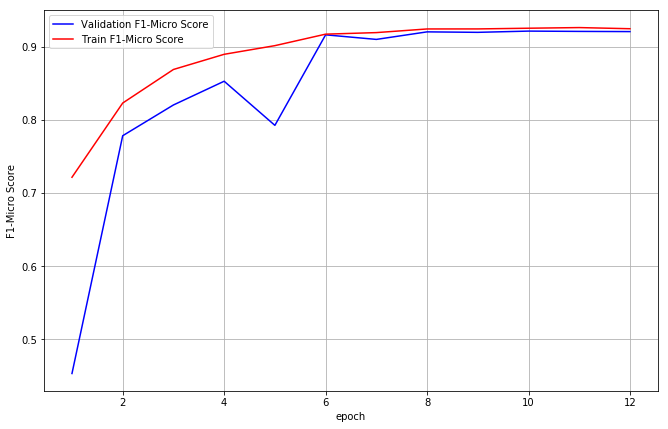

In [77]:
nb_epoch = len(history.history['f1_micro_score']) 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [11, 7]


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('F1-Micro Score')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_f1_micro_score']
ty = history.history['f1_micro_score']
plt_dynamic(x, vy, ty, ax, "F1-Micro Score")

141/141 [==============================] - 107s 756ms/step
Train log-loss :  0.093
Validation log-loss :  0.428
Test log-loss :  0.202
141/141 [==============================] - 45s 321ms/step
Train F1-micro avg score :  0.9296
Val F1-micro avg score :  0.9199
Test F1-micro avg score :  0.9203
Train Classification Report
              precision    recall  f1-score   support

         CNV       0.94      0.97      0.96     19322
         DME       0.94      0.84      0.88      5892
      DRUSEN       0.91      0.73      0.81      4474
      NORMAL       0.92      0.97      0.94     13662

    accuracy                           0.93     43350
   macro avg       0.93      0.88      0.90     43350
weighted avg       0.93      0.93      0.93     43350

Train Confusion Matrix


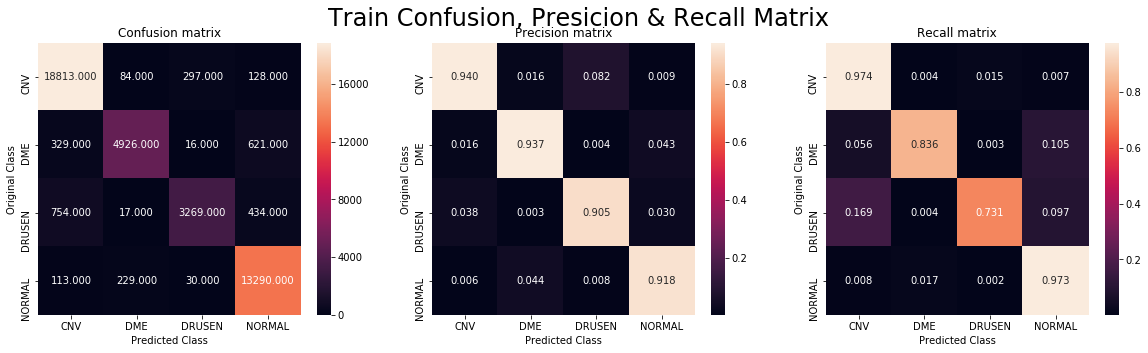

Validation Classification Report
              precision    recall  f1-score   support

         CNV       0.93      0.97      0.95      3410
         DME       0.93      0.83      0.88      1040
      DRUSEN       0.87      0.68      0.76       789
      NORMAL       0.91      0.97      0.94      2411

    accuracy                           0.92      7650
   macro avg       0.91      0.86      0.88      7650
weighted avg       0.92      0.92      0.92      7650

Validation Confusion Matrix


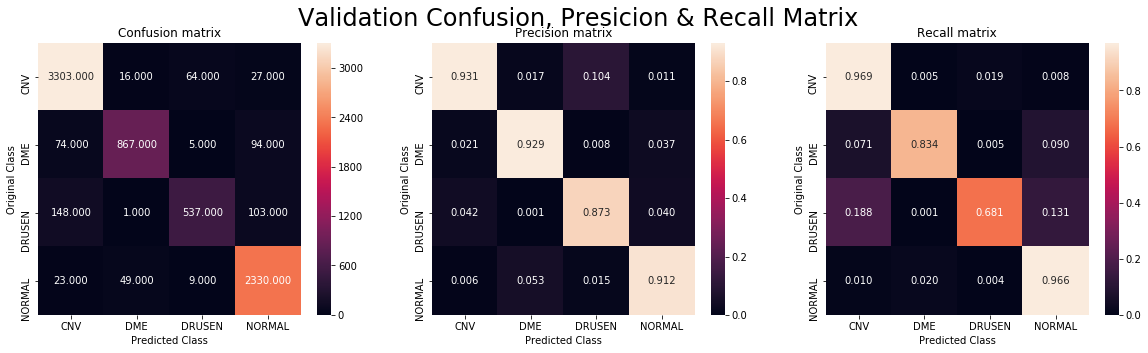

Test Classification Report
              precision    recall  f1-score   support

         CNV       0.94      0.97      0.95      4012
         DME       0.91      0.82      0.86      1223
      DRUSEN       0.89      0.73      0.80       929
      NORMAL       0.91      0.96      0.93      2837

    accuracy                           0.92      9001
   macro avg       0.91      0.87      0.89      9001
weighted avg       0.92      0.92      0.92      9001

Test Confusion Matrix


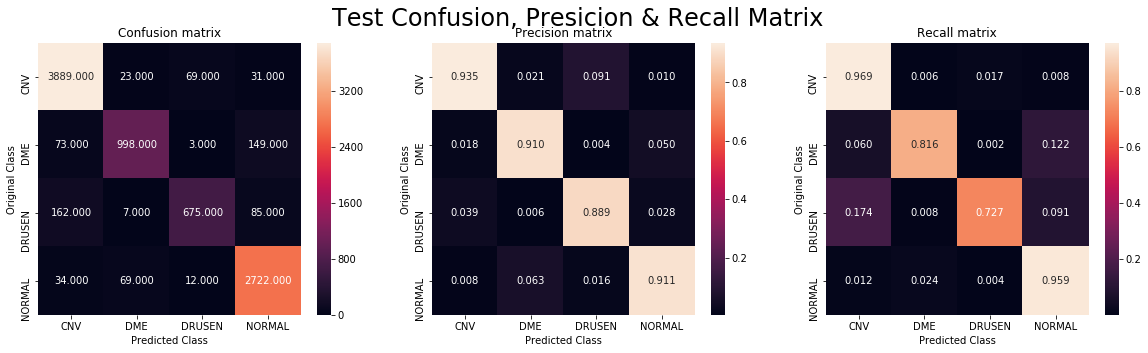

In [78]:
metric = report_of_model(model, model_name = "3 Layer CNN Model", batch_size = 64)    

In [80]:
metrics.append(metric)

In [82]:
pickle.dump(metrics, open("metrics.p","wb"))

In [20]:
metrics = pickle.load(open("metrics.p","rb"))

# 2) 7 layer CNN Model

In [84]:
# Ref : https://github.com/BadreeshShetty/OCT-Retinal/blob/master/OCT-Retinal%205%20CNN.ipynb

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation="relu",padding = 'same', input_shape = input_shape))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size = (3, 3), activation="relu",padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size = (3, 3), activation="relu",padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = (3, 3), activation="relu",padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size = (3, 3), activation="relu",padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size = (3, 3), activation="relu",padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, kernel_size = (3, 3), activation="relu",padding = 'same'))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))


print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_34 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_35 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 112, 112, 128)    

In [85]:
model, history = train_model(model, batch_size = 64, epochs = 20, model_no = 1)

Epoch 1/20
678/678 [==============================] - 872s 1s/step - loss: 0.4637 - f1_micro_score: 0.8353 - val_loss: 1.8722 - val_f1_micro_score: 0.6366

Epoch 00001: val_loss improved from inf to 1.87217, saving model to model_2.hdf5
Epoch 2/20
678/678 [==============================] - 872s 1s/step - loss: 0.2049 - f1_micro_score: 0.9305 - val_loss: 1.1848 - val_f1_micro_score: 0.8151

Epoch 00002: val_loss improved from 1.87217 to 1.18477, saving model to model_2.hdf5
Epoch 3/20
678/678 [==============================] - 862s 1s/step - loss: 0.1670 - f1_micro_score: 0.9428 - val_loss: 1.1990 - val_f1_micro_score: 0.7727

Epoch 00003: val_loss did not improve from 1.18477

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 4/20
678/678 [==============================] - 860s 1s/step - loss: 0.1206 - f1_micro_score: 0.9589 - val_loss: 0.1873 - val_f1_micro_score: 0.9540

Epoch 00004: val_loss improved from 1.18477 to 0.18734, saving model to model

In [86]:
model = load_model("model_2.hdf5", custom_objects={"f1_micro_score": f1_micro_score})

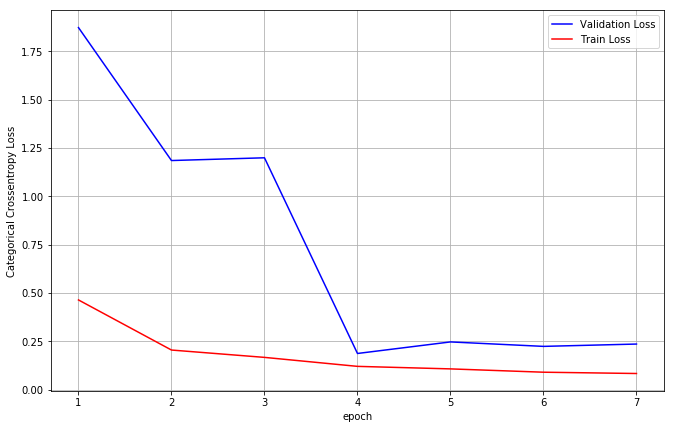

In [87]:
nb_epoch = len(history.history['loss']) 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [11, 7]


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, "Loss")

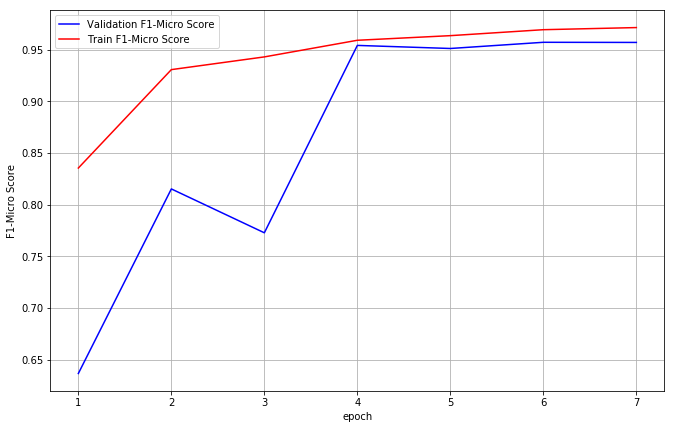

In [88]:
nb_epoch = len(history.history['f1_micro_score']) 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [11, 7]


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('F1-Micro Score')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_f1_micro_score']
ty = history.history['f1_micro_score']
plt_dynamic(x, vy, ty, ax, "F1-Micro Score")

141/141 [==============================] - 66s 471ms/step
Train log-loss :  0.042
Validation log-loss :  0.187
Test log-loss :  0.233
141/141 [==============================] - 65s 460ms/step
Train F1-micro avg score :  0.9649
Val F1-micro avg score :  0.9542
Test F1-micro avg score :  0.9582
Train Classification Report
              precision    recall  f1-score   support

         CNV       0.97      0.98      0.97     19322
         DME       0.96      0.96      0.96      5892
      DRUSEN       0.94      0.83      0.88      4474
      NORMAL       0.98      0.99      0.98     13662

    accuracy                           0.96     43350
   macro avg       0.96      0.94      0.95     43350
weighted avg       0.96      0.96      0.96     43350

Train Confusion Matrix


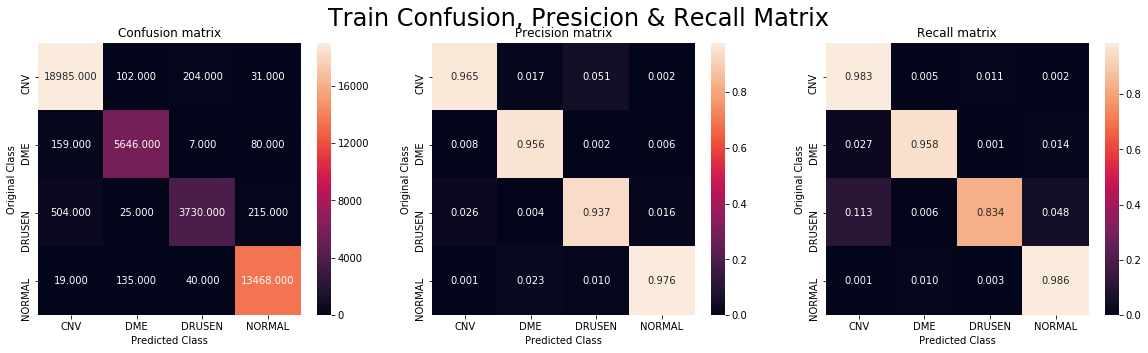

Validation Classification Report
              precision    recall  f1-score   support

         CNV       0.96      0.98      0.97      3410
         DME       0.95      0.93      0.94      1040
      DRUSEN       0.91      0.79      0.85       789
      NORMAL       0.97      0.98      0.97      2411

    accuracy                           0.95      7650
   macro avg       0.95      0.92      0.93      7650
weighted avg       0.95      0.95      0.95      7650

Validation Confusion Matrix


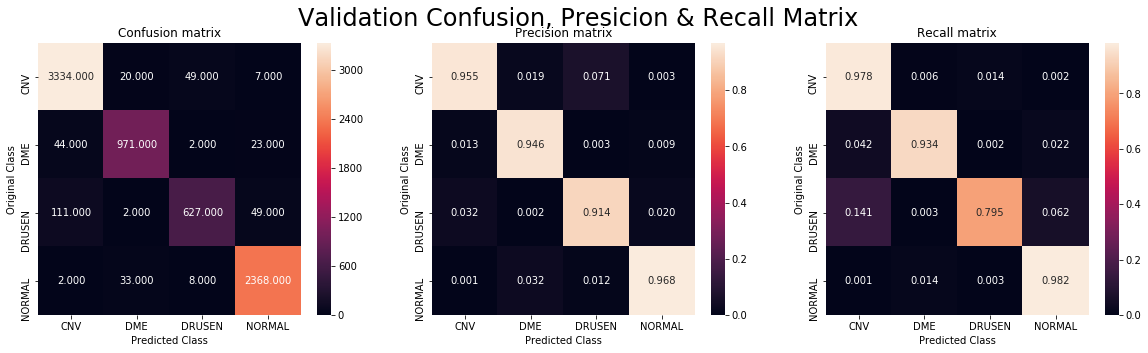

Test Classification Report
              precision    recall  f1-score   support

         CNV       0.96      0.98      0.97      4012
         DME       0.93      0.95      0.94      1223
      DRUSEN       0.93      0.82      0.87       929
      NORMAL       0.98      0.98      0.98      2837

    accuracy                           0.96      9001
   macro avg       0.95      0.93      0.94      9001
weighted avg       0.96      0.96      0.96      9001

Test Confusion Matrix


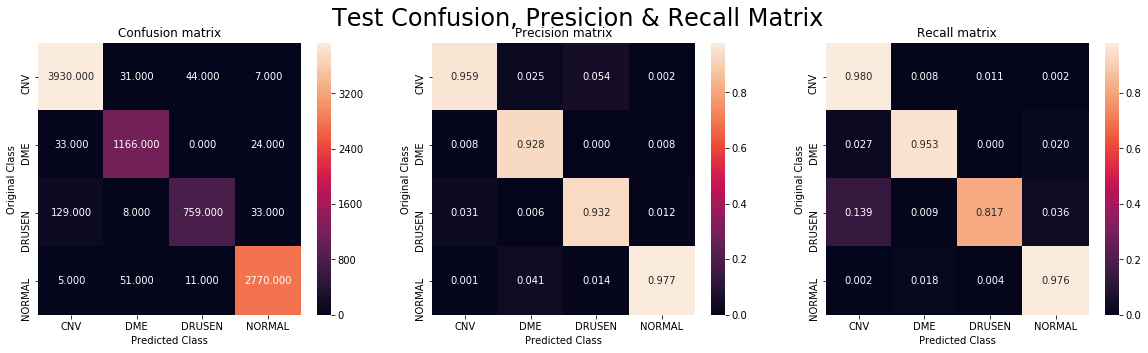

In [89]:
metric = report_of_model(model, model_name = "7 Layer CNN Model", batch_size = 64)    

In [91]:
metrics.append(metric)

In [106]:
pickle.dump(metrics, open("metrics.p","wb"))

In [20]:
metrics = pickle.load(open("metrics.p","rb"))

# 3) VGG16 Transfer Learning

In [22]:
# Ref: https://github.com/BadreeshShetty/OCT-Retinal/blob/master/OCT-Retinal-VGG.ipynb

base_model = VGG16(weights='imagenet',include_top=False, pooling=None, input_shape=(224,224,3))

x = base_model.output
x = Flatten(name = "flatten")(x)
x = Dense(384, activation = "relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation = "relu")(x)
x = Dropout(0.5)(x)
x = Dense(32, activation = "relu")(x)



output = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
# Train top layer
for layer in base_model.layers:
    layer.trainable = False

print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________

In [23]:
model, history = train_model(model, batch_size = 64, epochs = 20, model_no = 2)




Epoch 1/20
678/678 [==============================] - 1589s 2s/step - loss: 0.5031 - f1_micro_score: 0.8153 - val_loss: 0.4571 - val_f1_micro_score: 0.8518

Epoch 00001: val_loss improved from inf to 0.45706, saving model to model_3.hdf5

Epoch 2/20
678/678 [==============================] - 465s 685ms/step - loss: 0.3473 - f1_micro_score: 0.8760 - val_loss: 0.3651 - val_f1_micro_score: 0.8927

Epoch 00002: val_loss improved from 0.45706 to 0.36509, saving model to model_3.hdf5
Epoch 3/20
678/678 [==============================] - 465s 685ms/step - loss: 0.3040 - f1_micro_score: 0.8909 - val_loss: 0.3125 - val_f1_micro_score: 0.8992

Epoch 00003: val_loss improved from 0.36509 to 0.31249, saving model to model_3.hdf5
Epoch 4/20
678/678 [==============================] - 462s 682ms/step - loss: 0.2739 - f1_micro_score: 0.9031 - val_loss: 0.2959 - val_f1_micro_score: 0.9070

Epoch 00004: val_loss improved from 0.31249 to 0.29593, saving model to model_3.hdf5
Epoch 5/20
678/678 [======

In [35]:
model = load_model("model_3.hdf5", custom_objects={"f1_micro_score": f1_micro_score})

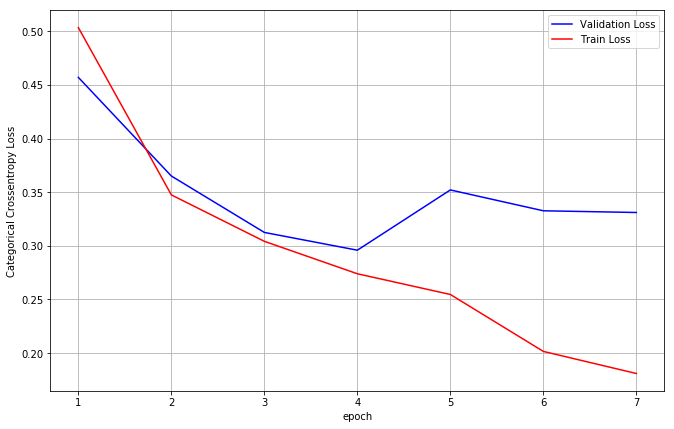

In [24]:
nb_epoch = len(history.history['loss']) 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [11, 7]


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, "Loss")

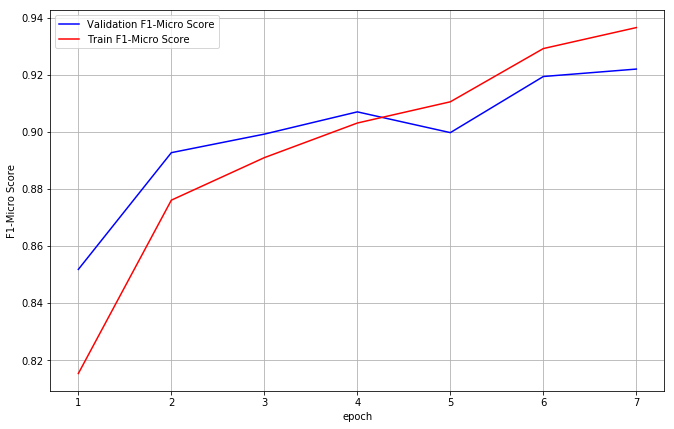

In [25]:
nb_epoch = len(history.history['f1_micro_score']) 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [11, 7]


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('F1-Micro Score')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_f1_micro_score']
ty = history.history['f1_micro_score']
plt_dynamic(x, vy, ty, ax, "F1-Micro Score")

141/141 [==============================] - 282s 2s/step
Train log-loss :  0.063
Validation log-loss :  0.296
Test log-loss :  0.312
141/141 [==============================] - 80s 570ms/step
Train F1-micro avg score :  0.9298
Val F1-micro avg score :  0.9071
Test F1-micro avg score :  0.9089
Train Classification Report
              precision    recall  f1-score   support

         CNV       0.95      0.96      0.95     19322
         DME       0.96      0.86      0.90      5892
      DRUSEN       0.80      0.76      0.78      4474
      NORMAL       0.94      0.97      0.95     13662

    accuracy                           0.93     43350
   macro avg       0.91      0.89      0.90     43350
weighted avg       0.93      0.93      0.93     43350

Train Confusion Matrix


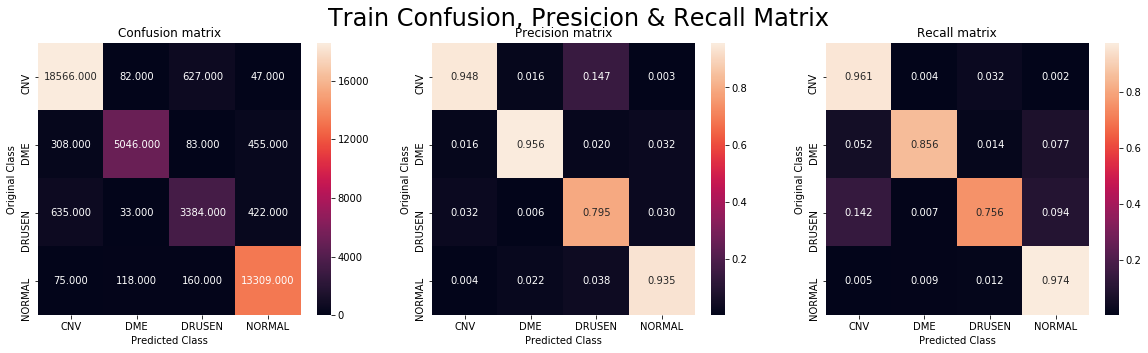

Validation Classification Report
              precision    recall  f1-score   support

         CNV       0.94      0.95      0.94      3410
         DME       0.94      0.81      0.87      1040
      DRUSEN       0.73      0.69      0.71       789
      NORMAL       0.91      0.96      0.93      2411

    accuracy                           0.91      7650
   macro avg       0.88      0.85      0.86      7650
weighted avg       0.91      0.91      0.91      7650

Validation Confusion Matrix


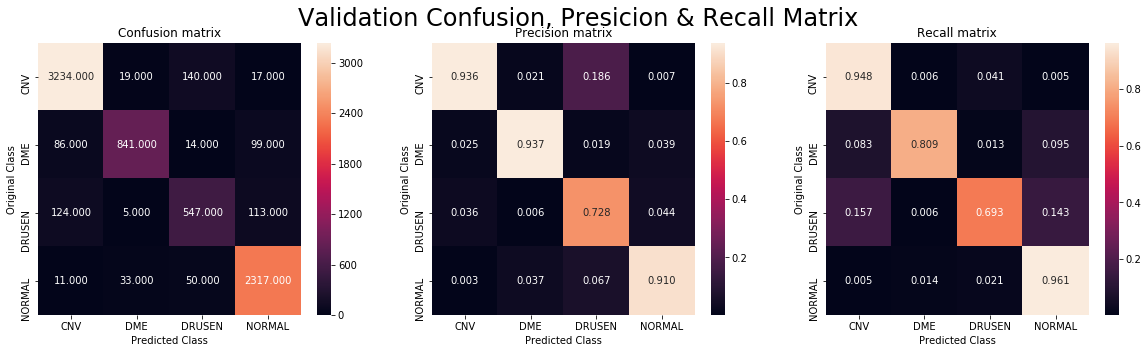

Test Classification Report
              precision    recall  f1-score   support

         CNV       0.93      0.95      0.94      4012
         DME       0.92      0.82      0.87      1223
      DRUSEN       0.74      0.71      0.73       929
      NORMAL       0.92      0.95      0.94      2837

    accuracy                           0.91      9001
   macro avg       0.88      0.86      0.87      9001
weighted avg       0.91      0.91      0.91      9001

Test Confusion Matrix


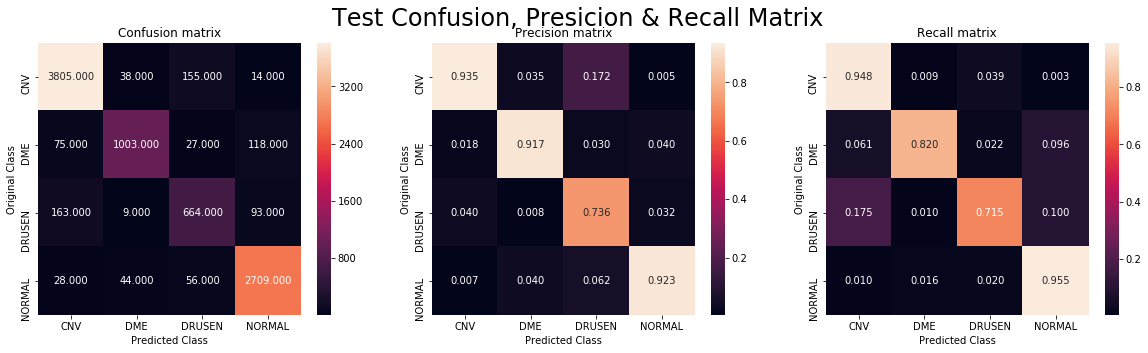

In [26]:
metric = report_of_model(model, model_name = "VGG16 Transfer Learning", batch_size = 64)    

In [28]:
metrics.append(metric)

In [30]:
pickle.dump(metrics, open("metrics.p","wb"))

In [31]:
metrics = pickle.load(open("metrics.p","rb"))

# 4) ReNet50 Transfer Learning

In [20]:
# Ref: https://github.com/BadreeshShetty/OCT-Retinal/blob/master/OCT-Retinal-VGG.ipynb

base_model = ResNet50(weights='imagenet',include_top=False, pooling='max', input_shape=(224,224,3))

x = base_model.output
x = Dropout(0.6)(x)

output = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
# Train top layer
for layer in base_model.layers[:3]:
    layer.trainable = False

print(model.summary())

94773248/94765736 [==============================] - 43s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________

In [21]:
model, history = train_model(model, batch_size = 64, epochs = 20, model_no = 3)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 678 steps, validate for 120 steps
Epoch 1/20
677/678 [============================>.] - ETA: 0s - loss: 1.0631 - f1_micro_score: 0.7703
Epoch 00001: val_loss improved from inf to 1.34195, saving model to model_4.hdf5
678/678 [==============================] - 378s 557ms/step - loss: 1.0625 - f1_micro_score: 0.7703 - val_loss: 1.3419 - val_f1_micro_score: 0.4453
Epoch 2/20
677/678 [============================>.] - ETA: 0s - loss: 0.5976 - f1_micro_score: 0.8233
Epoch 00002: val_loss improved from 1.34195 to 0.45106, saving model to model_4.hdf5
678/678 [==============================] - 358s 528ms/step - loss: 0.5969 - f1_micro_score: 0.8235 - val_loss: 0.4511 - val_f1_micro_score: 0.8304
Epoch 3/20
677/678 [============================>.] - ETA: 0s - loss: 1.3263 - f1_micro_score: 0.7731
Epoch 00003: val_loss did not improve from 0.45106

Epoch 00003:

In [22]:
model = load_model("model_4.hdf5", custom_objects={"f1_micro_score": f1_micro_score})

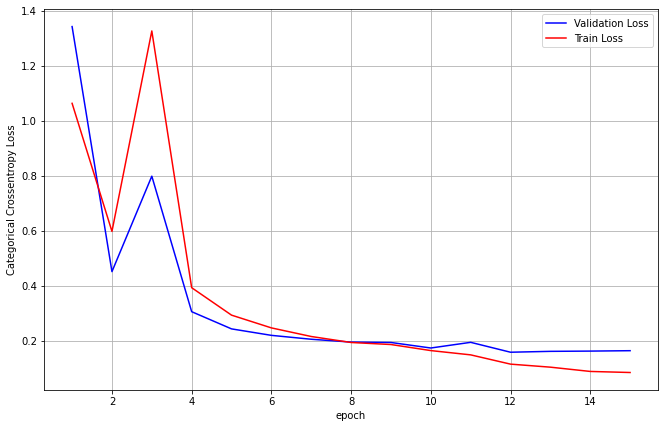

In [23]:
nb_epoch = len(history.history['loss']) 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [11, 7]


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, "Loss")

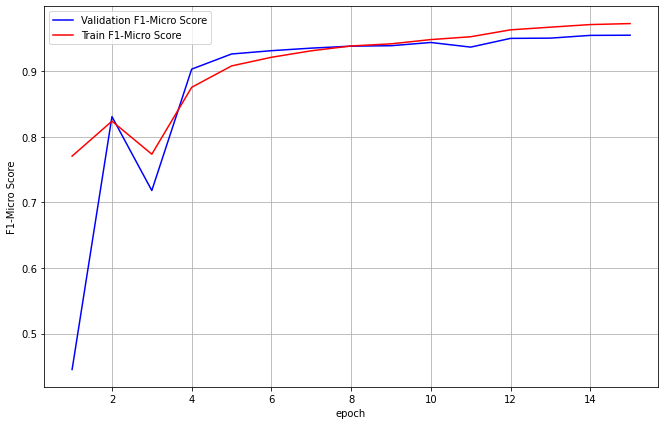

In [24]:
nb_epoch = len(history.history['f1_micro_score']) 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [11, 7]


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('F1-Micro Score')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_f1_micro_score']
ty = history.history['f1_micro_score']
plt_dynamic(x, vy, ty, ax, "F1-Micro Score")

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
678/678 [==============================] - 291s 429ms/step - loss: 0.0957 - f1_micro_score: 0.9678
  ...
    to  
  ['...']
120/120 [==============================] - 53s 438ms/step - loss: 0.1580 - f1_micro_score: 0.9496
  ...
    to  
  ['...']
141/141 [==============================] - 64s 451ms/step - loss: 0.1541 - f1_micro_score: 0.9493
Train log-loss :  0.096
Validation log-loss :  0.158
Test log-loss :  0.154
Instructions for updating:
Please use Model.predict, which supports generators.
141/141 [==============================] - 60s 423ms/step
Train F1-micro avg score :  0.9677
Val F1-micro avg score :  0.9495
Test F1-micro avg score :  0.9492
Train Classification Report
              precision    recall  f1-score   support

         CNV       0.98      0.97      0.98     19319
         DME       0.95      0.96      0.96      5893
      DRUSEN       0.90      0.90      0.9

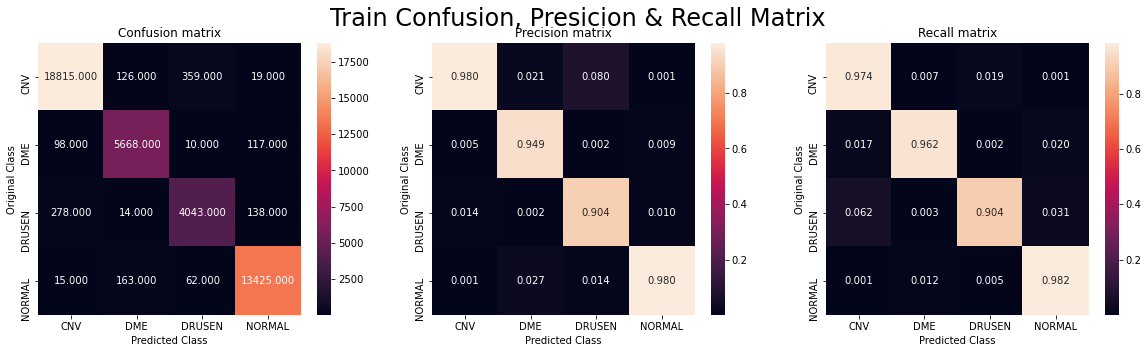

Validation Classification Report
              precision    recall  f1-score   support

         CNV       0.97      0.96      0.96      3409
         DME       0.93      0.93      0.93      1040
      DRUSEN       0.86      0.87      0.86       790
      NORMAL       0.97      0.98      0.97      2411

    accuracy                           0.95      7650
   macro avg       0.93      0.93      0.93      7650
weighted avg       0.95      0.95      0.95      7650

Validation Confusion Matrix


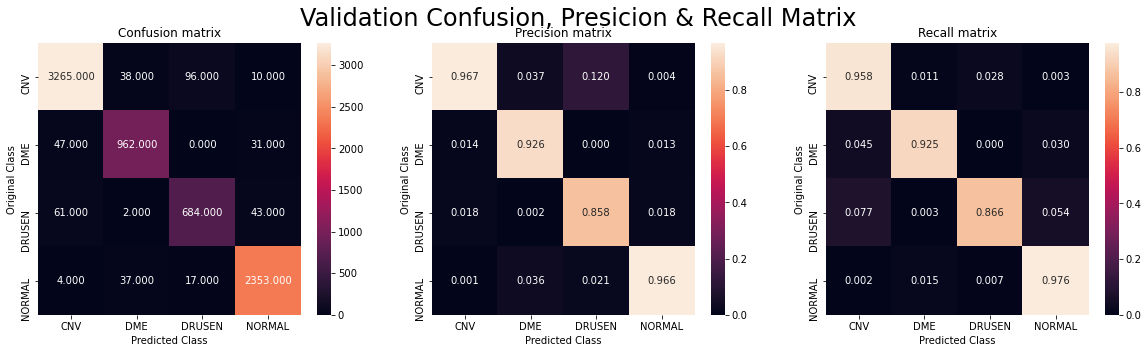

Test Classification Report
              precision    recall  f1-score   support

         CNV       0.97      0.96      0.97      4011
         DME       0.93      0.93      0.93      1223
      DRUSEN       0.86      0.84      0.85       929
      NORMAL       0.96      0.97      0.97      2837

    accuracy                           0.95      9000
   macro avg       0.93      0.93      0.93      9000
weighted avg       0.95      0.95      0.95      9000

Test Confusion Matrix


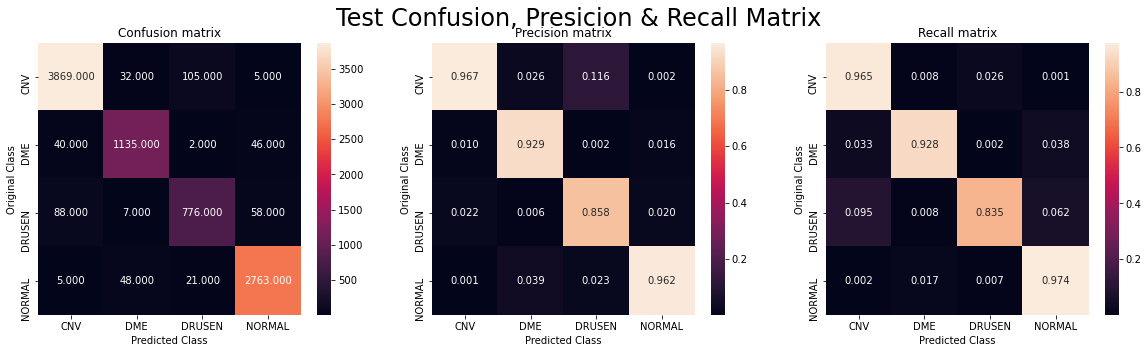

In [25]:
metric = report_of_model(model, model_name = "ResNet50 Transfer Learning", batch_size = 64)    

In [ ]:
def

In [26]:
metrics.append(metric)

In [27]:
pickle.dump(metrics, open("metrics.p","wb"))

In [20]:
metrics = pickle.load(open("metrics.p","rb"))

# 5) DenseNet121 Transfer Learning

In [20]:
base_model = DenseNet121(weights='imagenet',include_top=False, pooling='max', input_shape=(224,224,3))

x = base_model.output
x = Dropout(0.4)(x)

output = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
# Train top layer
for layer in base_model.layers[:3]:
    layer.trainable = False

print(model.summary())

29089792/29084464 [==============================] - 85s 3us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________

In [21]:
model, history = train_model(model, batch_size = 32, epochs = 20, model_no = 4)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1355 steps, validate for 240 steps
Epoch 1/20
1354/1355 [============================>.] - ETA: 0s - loss: 0.4295 - f1_micro_score: 0.8884
Epoch 00001: val_loss improved from inf to 4.78193, saving model to model_5.hdf5
1355/1355 [==============================] - 331s 244ms/step - loss: 0.4292 - f1_micro_score: 0.8884 - val_loss: 4.7819 - val_f1_micro_score: 0.8496
Epoch 2/20
1354/1355 [============================>.] - ETA: 0s - loss: 0.9924 - f1_micro_score: 0.7021
Epoch 00002: val_loss did not improve from 4.78193

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1355/1355 [==============================] - 302s 223ms/step - loss: 0.9922 - f1_micro_score: 0.7021 - val_loss: 10.3481 - val_f1_micro_score: 0.7087
Epoch 3/20
1354/1355 [============================>.] - ETA: 0s - loss: 0.4461 - f1_micro_score: 0.8421
Epoc

In [22]:
model = load_model("model_5.hdf5", custom_objects={"f1_micro_score": f1_micro_score})

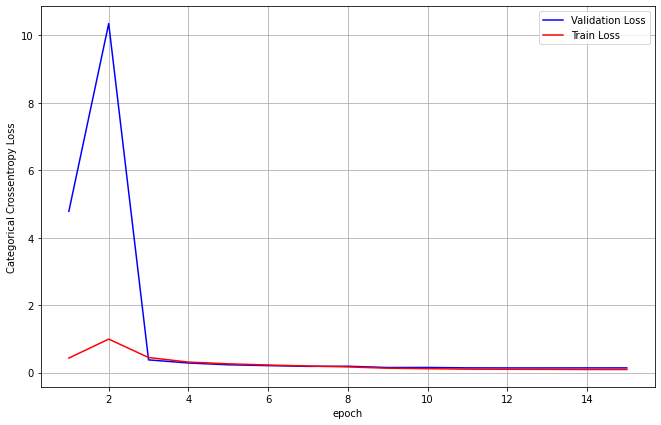

In [23]:
nb_epoch = len(history.history['loss']) 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [11, 7]


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, "Loss")

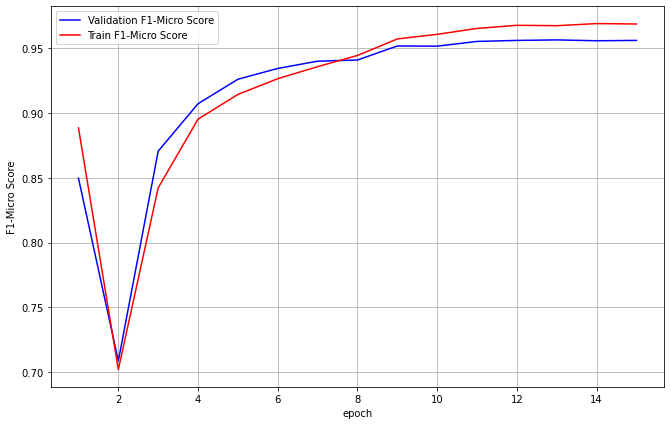

In [24]:
nb_epoch = len(history.history['f1_micro_score']) 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [11, 7]


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('F1-Micro Score')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_f1_micro_score']
ty = history.history['f1_micro_score']
plt_dynamic(x, vy, ty, ax, "F1-Micro Score")

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
678/678 [==============================] - 154s 228ms/step - loss: 0.0906 - f1_micro_score: 0.9684
  ...
    to  
  ['...']
120/120 [==============================] - 29s 238ms/step - loss: 0.1383 - f1_micro_score: 0.9557
  ...
    to  
  ['...']
141/141 [==============================] - 39s 276ms/step - loss: 0.1381 - f1_micro_score: 0.9522
Train log-loss :  0.091
Validation log-loss :  0.138
Test log-loss :  0.138
Instructions for updating:
Please use Model.predict, which supports generators.
141/141 [==============================] - 32s 227ms/step
Train F1-micro avg score :  0.9683
Val F1-micro avg score :  0.9557
Test F1-micro avg score :  0.9521
Train Classification Report
              precision    recall  f1-score   support

         CNV       0.98      0.98      0.98     19319
         DME       0.96      0.96      0.96      5893
      DRUSEN       0.90      0.89      0.9

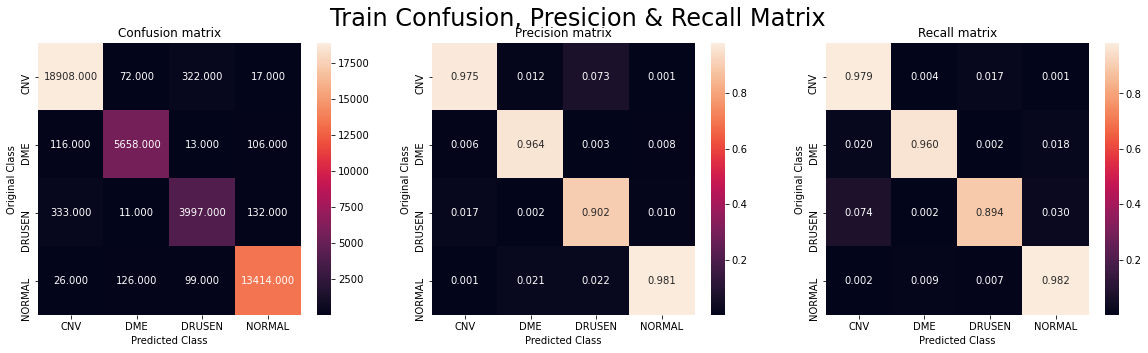

Validation Classification Report
              precision    recall  f1-score   support

         CNV       0.97      0.97      0.97      3409
         DME       0.95      0.93      0.94      1040
      DRUSEN       0.88      0.86      0.87       790
      NORMAL       0.97      0.97      0.97      2411

    accuracy                           0.96      7650
   macro avg       0.94      0.93      0.94      7650
weighted avg       0.96      0.96      0.96      7650

Validation Confusion Matrix


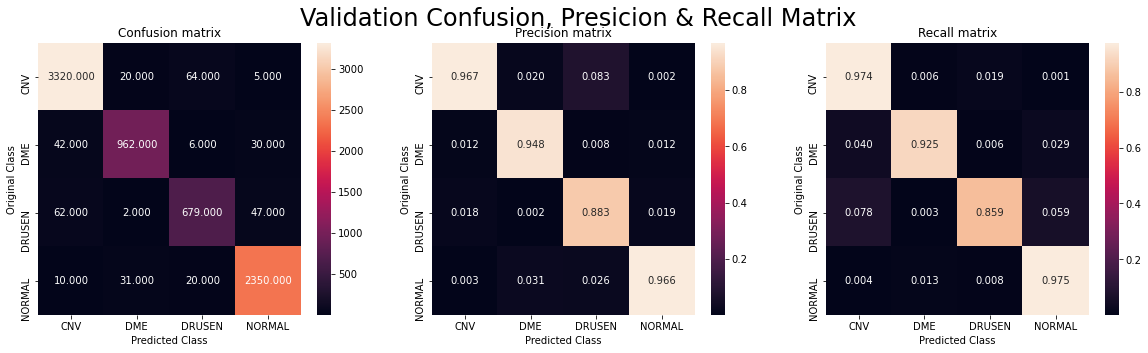

Test Classification Report
              precision    recall  f1-score   support

         CNV       0.97      0.97      0.97      4011
         DME       0.94      0.93      0.93      1223
      DRUSEN       0.88      0.84      0.86       929
      NORMAL       0.96      0.97      0.97      2837

    accuracy                           0.95      9000
   macro avg       0.94      0.93      0.93      9000
weighted avg       0.95      0.95      0.95      9000

Test Confusion Matrix


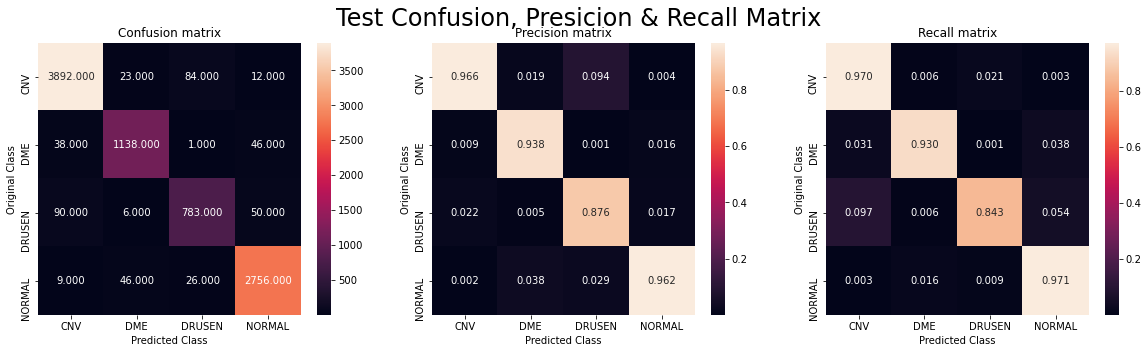

In [25]:
metric = report_of_model(model, model_name = "DenseNet121 Transfer Learning", batch_size = 64)    

In [27]:
metrics.append(metric)

In [35]:
pickle.dump(metrics, open("metrics.p","wb"))

In [36]:
metrics = pickle.load(open("metrics.p","rb"))

##### Här börjar utvärderingen av Gymnasiearbetet

In [23]:
model = load_model("model_5.hdf5", custom_objects={"f1_micro_score": f1_micro_score})

In [34]:
if not os.path.isfile("pat1data.csv"):
    pat1data = load_data("data/CarinBilder/Pat1")
    pat1data.to_csv("pat1data.csv", index=False)
    
pat1data = pd.read_csv("pat1data.csv")
pat1data.head()

,filename,path,Class
0,Pat1_B-Scan_R_001.jpg,data/CarinBilder/Pat1/CNV/Pat1_B-Scan_R_001.jpg,0
1,Pat1_B-Scan_R_002.jpg,data/CarinBilder/Pat1/CNV/Pat1_B-Scan_R_002.jpg,0
2,Pat1_B-Scan_R_003.jpg,data/CarinBilder/Pat1/CNV/Pat1_B-Scan_R_003.jpg,0
3,Pat1_B-Scan_R_004.jpg,data/CarinBilder/Pat1/CNV/Pat1_B-Scan_R_004.jpg,0
4,Pat1_B-Scan_R_005.jpg,data/CarinBilder/Pat1/CNV/Pat1_B-Scan_R_005.jpg,0


In [35]:
X_data1 = pat1data['path'].values
Y_data1 = pat1data["Class"].values
y_data1 = utils.to_categorical(Y_data1, 4)


1/1 [==============================] - 0s 68ms/step


<IPython.core.display.Javascript object>


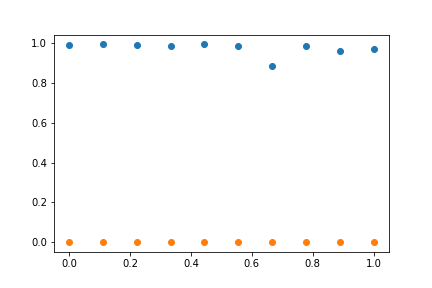

[0.99268895 0.9929877  0.989589   0.98363864 0.9932     0.9849237
 0.8865698  0.9861326  0.9580839  0.9687997 ]


In [33]:
y_test1_pred = model.predict_generator(imageLoader(X_data1, y_data1, 10), steps=1, verbose=1)
plt.plot(np.linspace(0, 1, 10), y_test1_pred[:,0:4:3], 'o');
print(y_test1_pred[:,0])

#### Här slutar utvärderingen gymnasiearbetet

  ...
    to  
  ['...']
678/678 [==============================] - 152s 224ms/step - loss: 0.0906 - f1_micro_score: 0.9684
  ...
    to  
  ['...']
120/120 [==============================] - 26s 221ms/step - loss: 0.1383 - f1_micro_score: 0.9557
  ...
    to  
  ['...']
1/1 [==============================] - 2s 2s/step - loss: 0.0441 - f1_micro_score: 0.9767
Train log-loss :  0.091
Validation log-loss :  0.138
Test log-loss :  0.044
1/1 [==============================] - 0s 95ms/step
Train F1-micro avg score :  0.9683
Val F1-micro avg score :  0.9557
Test F1-micro avg score :  0.9767
Train Classification Report
              precision    recall  f1-score   support

         CNV       0.98      0.98      0.98     19319
         DME       0.96      0.96      0.96      5893
      DRUSEN       0.90      0.89      0.90      4473
      NORMAL       0.98      0.98      0.98     13665

    accuracy                           0.97     43350
   macro avg       0.96      0.95      0.95     43350


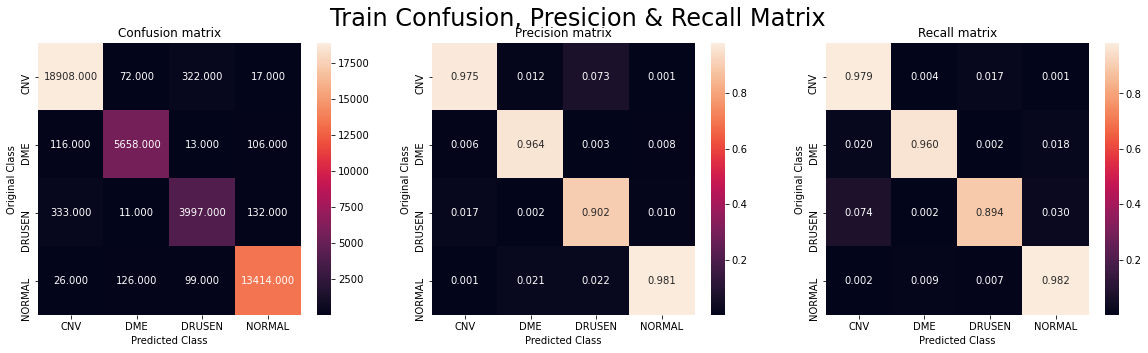

Validation Classification Report
              precision    recall  f1-score   support

         CNV       0.97      0.97      0.97      3409
         DME       0.95      0.93      0.94      1040
      DRUSEN       0.88      0.86      0.87       790
      NORMAL       0.97      0.97      0.97      2411

    accuracy                           0.96      7650
   macro avg       0.94      0.93      0.94      7650
weighted avg       0.96      0.96      0.96      7650

Validation Confusion Matrix


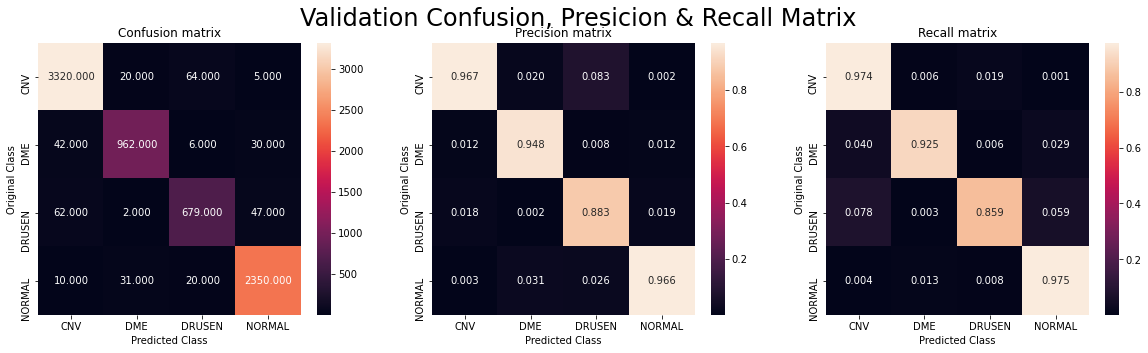

Test Classification Report
              precision    recall  f1-score   support

         CNV       0.91      1.00      0.95        10
         DME       1.00      1.00      1.00        11
      DRUSEN       1.00      0.91      0.95        11
      NORMAL       1.00      1.00      1.00        11

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43

Test Confusion Matrix


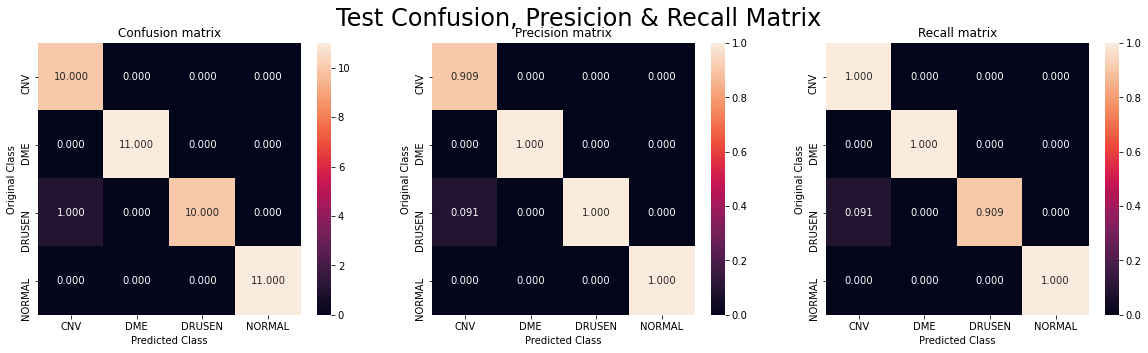

In [68]:
metric2 = report_of_model(model, model_name = "DenseNet121 Transfer Learning", batch_size = 64)

# Conclusion

In [38]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Train Loss", "Val Loss", "Test Loss"]
for i in metrics:
    x.add_row([i[0], round(i[1],4), round(i[3],4), round(i[5],4)])
print(x)

+-------------------------------+------------+----------+-----------+
|             Model             | Train Loss | Val Loss | Test Loss |
+-------------------------------+------------+----------+-----------+
|       3 Layer CNN Model       |   0.0929   |  0.4276  |   0.2018  |
|       7 Layer CNN Model       |   0.042    |  0.1873  |   0.2335  |
|    VGG16 Transfer Learning    |   0.0628   |  0.2959  |   0.3119  |
|   ResNet50 Transfer Learning  |   0.019    |  0.2734  |   0.2909  |
| DenseNet121 Transfer Learning |   0.0091   |  0.0921  |   0.4273  |
+-------------------------------+------------+----------+-----------+


In [39]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Train Micro-avg f1 score", "Val Micro-avg f1 score", "Test Micro-avg f1 score"]
for i in metrics:
    x.add_row([i[0], round(i[7],4), round(i[8],4), round(i[9],4)])
print(x)

+-------------------------------+--------------------------+------------------------+-------------------------+
|             Model             | Train Micro-avg f1 score | Val Micro-avg f1 score | Test Micro-avg f1 score |
+-------------------------------+--------------------------+------------------------+-------------------------+
|       3 Layer CNN Model       |          0.9296          |         0.9199         |          0.9203         |
|       7 Layer CNN Model       |          0.9649          |         0.9542         |          0.9582         |
|    VGG16 Transfer Learning    |          0.9298          |         0.9071         |          0.9089         |
|   ResNet50 Transfer Learning  |          0.9459          |         0.9366         |          0.9399         |
| DenseNet121 Transfer Learning |          0.9857          |         0.9561         |          0.9651         |
+-------------------------------+--------------------------+------------------------+-------------------

- **DenseNet121 Transfer Learning Model performed best as it has highest micro-avg f1 score**